In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

In [2]:
# Carga de datos
df = pd.read_csv('datos_sinteticos.csv', sep='|')

print(f"Dataset cargado correctamente. Forma: {df.shape}")
df.head()

Dataset cargado correctamente. Forma: (3000, 27)


,pref_iglesias,pref_resorts,pref_playas,pref_parques,pref_teatros,pref_museos,pref_centros_comerciales,pref_zoologicos,pref_restaurantes,pref_bares_pubs,...,pref_gimnasios,pref_panaderias,pref_belleza_spas,pref_cafeterias,pref_miradores,pref_monumentos,pref_jardines,duracion_deseada,destino,score
0,3.08,2.50,3.09,1.57,4.51,1.21,3.79,1.84,2.16,3.60,...,2.58,1.91,2.19,2.09,3.47,1.30,2.88,14,FLORECIMIENTO DE LOS CEIBOS EN PUNÁ,2.959740
1,1.59,1.29,2.71,3.90,1.90,4.13,2.23,2.63,4.40,2.42,...,1.52,3.07,2.43,2.71,3.45,2.44,0.71,9,CASCADA EL COLORADO,2.982883
2,2.88,2.43,3.91,2.11,4.48,4.13,0.80,2.06,2.08,2.94,...,4.53,3.59,1.37,3.58,4.24,1.11,2.15,5,MUSEO DE LAS CULTURAS,2.442313
3,3.40,2.81,3.67,0.97,2.26,4.14,1.75,3.76,3.58,4.28,...,2.62,4.38,3.70,2.43,2.82,1.27,3.77,13,GEOSITIO CHURO,2.791216
4,1.31,2.58,3.72,0.64,3.49,0.52,0.40,2.07,2.59,0.72,...,3.74,1.40,3.23,2.39,3.06,2.82,3.38,12,MONUMENTO A LOS MARIMBEROS,2.868834


In [3]:
# Información básica
print("=== Información del dataset ===")
print(df.info())

print("\n=== Valores nulos ===")
print(df.isnull().sum())

print("\n=== Estadísticas descriptivas ===")
df.describe()

=== Información del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pref_iglesias                   3000 non-null   float64
 1   pref_resorts                    3000 non-null   float64
 2   pref_playas                     3000 non-null   float64
 3   pref_parques                    3000 non-null   float64
 4   pref_teatros                    3000 non-null   float64
 5   pref_museos                     3000 non-null   float64
 6   pref_centros_comerciales        3000 non-null   float64
 7   pref_zoologicos                 3000 non-null   float64
 8   pref_restaurantes               3000 non-null   float64
 9   pref_bares_pubs                 3000 non-null   float64
 10  pref_servicios_locales          3000 non-null   float64
 11  pref_pizzerias_hamburgueserias  3000 non-null   float64
 12  pr

,pref_iglesias,pref_resorts,pref_playas,pref_parques,pref_teatros,pref_museos,pref_centros_comerciales,pref_zoologicos,pref_restaurantes,pref_bares_pubs,...,pref_piscinas,pref_gimnasios,pref_panaderias,pref_belleza_spas,pref_cafeterias,pref_miradores,pref_monumentos,pref_jardines,duracion_deseada,score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.528830,2.488787,2.488850,2.462407,2.466393,2.488977,2.505850,2.496553,2.502983,2.501793,...,2.467490,2.487627,2.499903,2.494750,2.496530,2.501343,2.500563,2.484650,7.525000,3.043096
std,1.139556,1.111251,1.130665,1.119915,1.132030,1.106168,1.108656,1.121893,1.122367,1.102374,...,1.114669,1.129731,1.099695,1.109566,1.108059,1.117093,1.111019,1.103275,4.051195,0.328643
min,0.040000,0.050000,0.030000,0.030000,0.040000,0.020000,0.030000,0.040000,0.030000,0.080000,...,0.030000,0.020000,0.050000,0.040000,0.010000,0.030000,0.040000,0.010000,1.000000,1.780238
25%,1.610000,1.630000,1.620000,1.590000,1.580000,1.620000,1.670000,1.580000,1.627500,1.670000,...,1.610000,1.637500,1.680000,1.667500,1.640000,1.640000,1.640000,1.670000,4.000000,2.813386
50%,2.540000,2.480000,2.470000,2.430000,2.455000,2.510000,2.495000,2.495000,2.515000,2.510000,...,2.440000,2.505000,2.500000,2.490000,2.510000,2.520000,2.510000,2.470000,8.000000,3.038493
75%,3.450000,3.360000,3.380000,3.330000,3.350000,3.350000,3.350000,3.350000,3.380000,3.340000,...,3.310000,3.360000,3.350000,3.350000,3.360000,3.372500,3.380000,3.330000,11.000000,3.254019
max,4.970000,4.980000,4.960000,4.990000,4.960000,4.930000,4.920000,4.930000,4.980000,4.950000,...,4.940000,4.960000,4.960000,4.940000,4.850000,4.930000,4.950000,4.990000,14.000000,4.221720


In [17]:
# Contar filas únicas (registros) en todo el dataset
num_unicas = df.drop_duplicates().shape[0]
print(f"Filas únicas (sin duplicados exactos): {num_unicas}")
print(f"Filas totales: {len(df)}")
print(f"Duplicados exactos: {len(df) - num_unicas}")

Filas únicas (sin duplicados exactos): 3000
Filas totales: 3000
Duplicados exactos: 0


=== Distribución de destinos ===
destino
BOSQUE LA ESPERANZA                                         9
CASCADA SAN JOAQUIN                                         8
PARQUE DE El ROSARIO                                        7
FUENTE MONUMENTAL                                           7
MOLIENDA_CRISTO_DEL_CONSUELO                                7
                                                           ..
EDIFICIO DE CORREOS DE ECUADOR                              1
CASA CUASMAL                                                1
PUERTO PITAHAYA                                             1
MUSEOS DE LOS EQUIPOS DEL ASTILLEROS: BARCELONA Y EMELEC    1
CERRO MANDANGO                                              1
Name: count, Length: 1047, dtype: int64


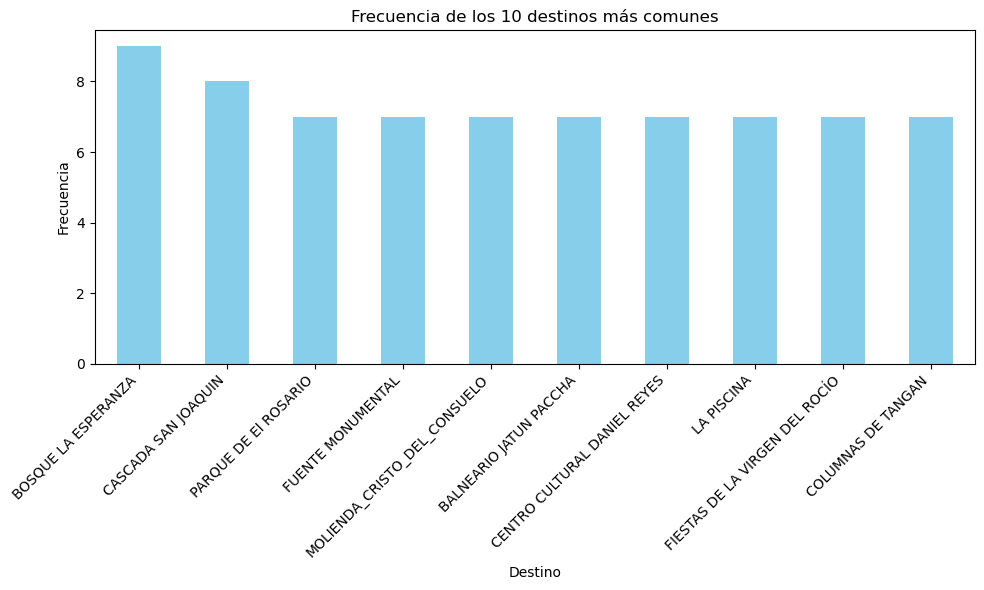

In [4]:
print("=== Distribución de destinos ===")
print(df['destino'].value_counts())

# Obtenemos unicamente el top 10 para ejemplificación
top_10_destinos = df['destino'].value_counts().head(10)

# Gráfico del top 10
plt.figure(figsize=(10, 6))
top_10_destinos.plot(kind='bar', color='skyblue')
plt.title("Frecuencia de los 10 destinos más comunes")
plt.xlabel("Destino")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

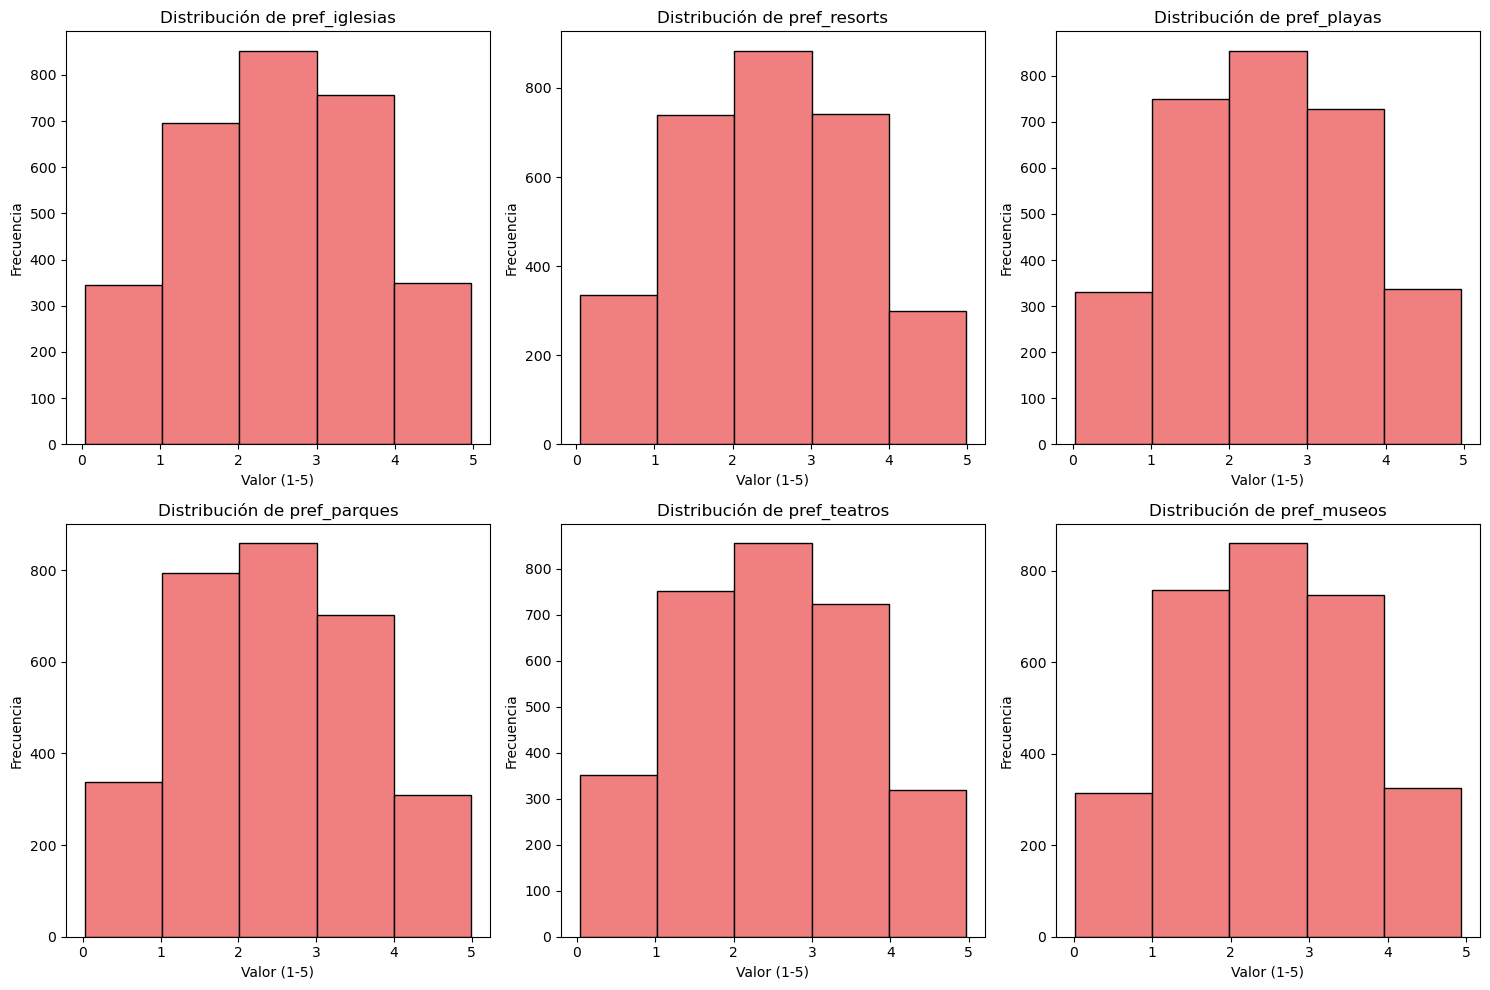

In [5]:
# Seleccionar columnas de preferencias
pref_cols = [col for col in df.columns if col.startswith('pref_')]

# Mostrar distribución de algunas preferencias
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(pref_cols[:6]):  # Mostrar solo 6 para no saturar
    axes[i].hist(df[col], bins=5, color='lightcoral', edgecolor='black')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('Valor (1-5)')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

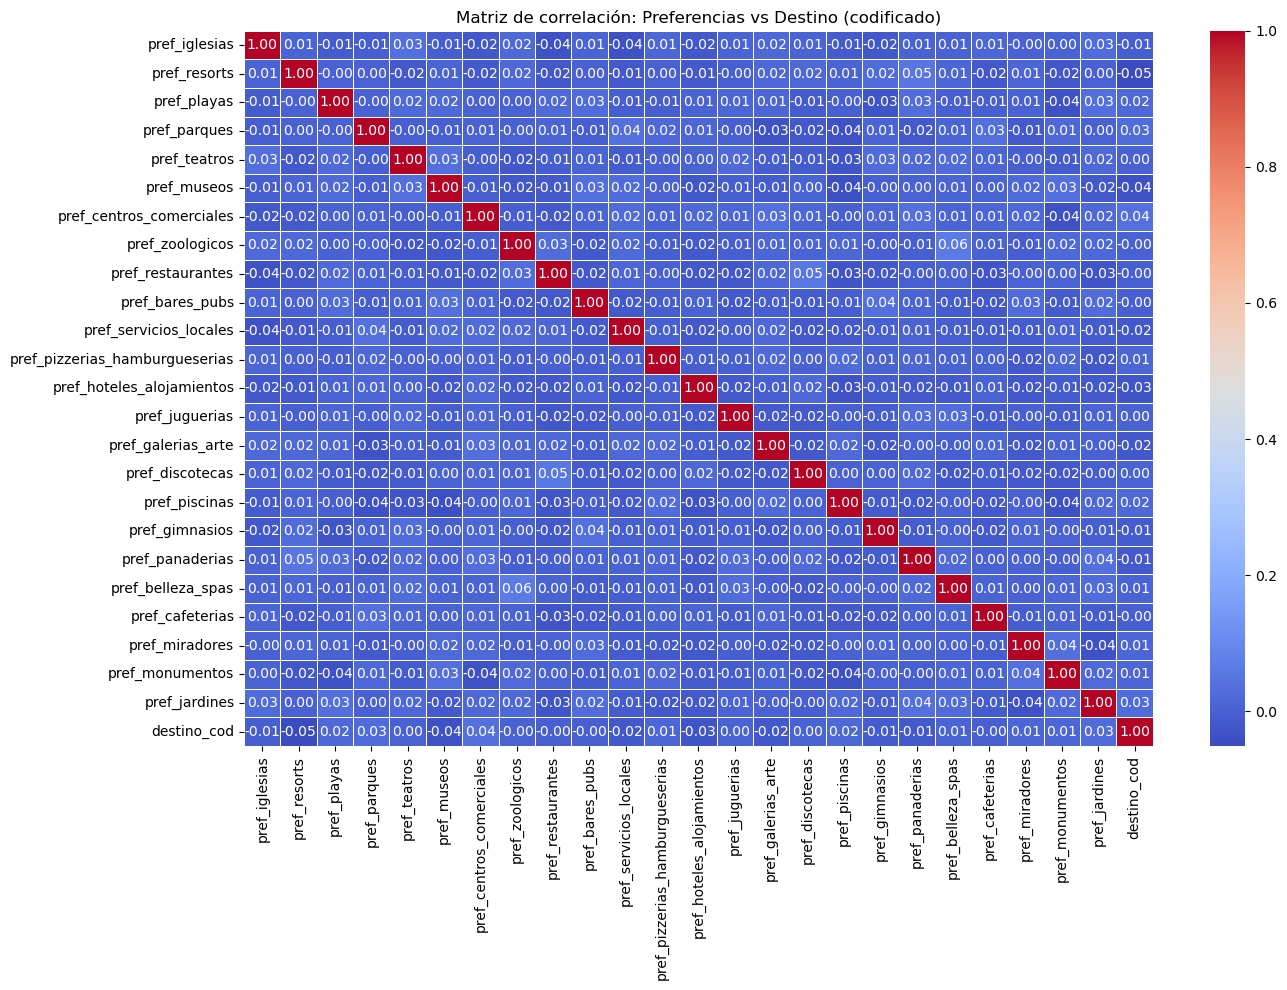

In [6]:
# Codificar 'destino' para análisis numérico
le = LabelEncoder()
df['destino_cod'] = le.fit_transform(df['destino'])

# Calcular correlación
correlation_data = df[pref_cols + ['destino_cod']].corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación: Preferencias vs Destino (codificado)")
plt.tight_layout()
plt.show()

# Eliminar columna temporal
df.drop('destino_cod', axis=1, inplace=True)

In [8]:
# Filtrar el DataFrame
top_20_destinos = df['destino'].value_counts().head(20).index
df_filtrado = df[df['destino'].isin(top_20_destinos)].reset_index(drop=True)

print(f"Filas seleccionadas: {len(df_filtrado)}")
print(f"Destinos únicos: {df_filtrado['destino'].nunique()}")

Filas seleccionadas: 139
Destinos únicos: 20


In [9]:
# Definir características y objetivo
pref_cols2 = [col for col in df_filtrado.columns if col.startswith('pref_')]
X = df_filtrado[pref_cols2 + ['duracion_deseada']]
y = df_filtrado['destino']

# Codificar etiquetas
y_encoded = le.fit_transform(y)

print(f"Características: {X.shape}")
print(f"Etiquetas: {y_encoded.shape}")

Características: (139, 25)
Etiquetas: (139,)


In [10]:
# Separamos variables de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"\nEntrenamiento: {X_train.shape[0]} ejemplos")
print(f"Prueba: {X_test.shape[0]} ejemplos")
print(f"Clases únicas en entrenamiento: {len(np.unique(y_train))}")


Entrenamiento: 111 ejemplos
Prueba: 28 ejemplos
Clases únicas en entrenamiento: 20


In [15]:
# Entrenar modelo clasificador -> se trata de predecir una target en base a sus features
modelXG = XGBClassifier(
    # num arboles de decisión -> cada árbol intenta corregir los errores del anterior
    n_estimators=100,  # valor tipico: entre 50 y 500
    # Niveles de ramificación -> nodos de profundidad
    # mas profundidad -> modelo mas complejo -> riesgo de sobreajuste
    # menos profundidad -> modelo mas simple -> riesgo de subajuste
    max_depth=6, # valor tipico: entre 3 y 10
    # Semilla aleatoria para reproducibilidad
    # obtener los mismos resultados cada vez que se entrena con los mismos datos
    random_state=42,
    # Mide que tan bien el modelo predice probabilidades correctas para cada clase
    eval_metric='mlogloss' # metrica adecuada para clasificación multiclase
)

print("Entrenando el modelo...")
modelXG.fit(X_train, y_train)
print("Modelo entrenado correctamente.")

Entrenando el modelo...
Modelo entrenado correctamente.


In [11]:
# Entrenamiento con random forest
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(
    n_estimators=100,        # número de árboles
    max_depth=10,            # profundidad un poco mayor que XGBoost
    random_state=42,
    class_weight='balanced'  # compensa clases desbalanceadas
)

print("Entrenando Random Forest...")
modelRF.fit(X_train, y_train)
print("Modelo entrenado correctamente.")

Entrenando Random Forest...
Modelo entrenado correctamente.


In [16]:
# Predecir con xg boost
y_pred = modelXG.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {acc:.4f}\n")

print("=== Reporte de clasificación ===")
print(classification_report(y_test, y_pred))

Precisión (Accuracy): 0.1071

=== Reporte de clasificación ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.33      1.00      0.50         1
           8       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16      

C:\Users\Jaimestrax\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jaimestrax\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jaimestrax\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Evaluación de random forest

y_pred2 = modelRF.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
print(f"\nPrecisión (Random Forest): {acc2:.4f}")

print("\n=== Reporte de clasificación ===")
print(classification_report(y_test, y_pred2))


Precisión (Random Forest): 0.0000

=== Reporte de clasificación ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       2.0
           3       0.00      0.00      0.00       2.0
           4       0.00      0.00      0.00       2.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       2.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       2.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       2.0
          12       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       2.0
          14       0.00      0.00      0.00       2.0
          15       0.00      0.00      0.00       1.0
          16

C:\Users\Jaimestrax\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jaimestrax\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jaimestrax\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
